# NUIT workshop
## Intro to Numpy and Scipy

Marco A. Alsina

May 10 2018

From Wikipedia:

>NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."

>SciPy is an open-source Python library used for scientific computing and technical computing.
SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

### 01. References and Resources for Numpy and Scipy

Numpy Reference Documentation:
https://docs.scipy.org/doc/numpy/reference/

Scipy Reference Documentation:
https://docs.scipy.org/doc/scipy/reference/

Matplotlib Thumbnail Gallery
https://matplotlib.org/gallery.html

Jupyter Notebook tips and tricks:
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

#### Resources for Numpy and Scipy

Numpy Quickstart Tutorial:
https://docs.scipy.org/doc/numpy-dev/user/quickstart.html


Scipy Tutorial:
https://docs.scipy.org/doc/scipy/reference/tutorial/index.html

Scipy Lecture Notes:
http://www.scipy-lectures.org/

Additional Tutorials:

https://www.dataquest.io/blog/numpy-tutorial-python/

https://www.datacamp.com/community/tutorials/python-numpy-tutorial

https://www.datacamp.com/community/tutorials/python-scipy-tutorial

In [1]:
# this is a comment
'''
Longer comments can be put by using triple quote marks
'''
# Lets start by loading the libraries through aliases
# and printing their versions (helpful for publication)

import sys
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

print ("Python version:", sys.version)
print ("Numpy version:", np.__version__)
print ("Scipy version:", sp.__version__)
print ("Matploltib version:", plt.__version__)

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy version: 1.14.0
Scipy version: 1.0.0
Matploltib version: 1.14.0


As you can see, in this workshop we will be using Python 3.6, as well as the latest versions of Numpy and Scipy.

We will also be plotting our data with Matplotlib.

Lets begin!

### 02. Arrays: Creation, indexing and slicing

In [2]:
# Numpy operates with arrays, which are containers for numerical data
# One way to create a vector array is with the arange function
# Note that the created array does not include the last value
x = np.arange(0,10)
print (x)
print (type(x), x.dtype)

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'> int32


In [3]:
# Numpy functions accept multiple arguments.
# You can check the documentation or invoke it directly via the help function
help(np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

In [4]:
# Another way to create arrays is with the linspace function
# Note that the created array does include the last value by default
x = np.linspace(1,20,20)
print (x)
print (type(x), x.dtype)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
<class 'numpy.ndarray'> float64


In [5]:
# Arrays in numpy are multidimensional.
# Therefore we can create a vector array and latter reshappe it as a matrix.
# 
a = np.arange(1,10)
print (a)
print ("Shape of a:", a.shape, "\n")

# Reshaping the data in 2 rows
# an index of -1 is unspecified, so numpy infers the correct number of cols
# During reshaping we need to pick the arrangement of the elements in the array.
# This can be row-wise or column wise, and matters significantly for later operations.
A = np.reshape(a, (3,-1), order='C')
print ("Reshaping in C order (row wise)")
print (A)
print ("Shape of A:", A.shape, "\n")

# Reshaping the data in 5 rows
A = np.reshape(a, (3,-1), order='F')
print ("Reshaping in Fortran order (col wise)")
print (A)
print ("Shape of A:", A.shape, "\n")

[1 2 3 4 5 6 7 8 9]
Shape of a: (9,) 

Reshaping in C order (row wise)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Shape of A: (3, 3) 

Reshaping in Fortran order (col wise)
[[1 4 7]
 [2 5 8]
 [3 6 9]]
Shape of A: (3, 3) 



In [6]:
# Sometimes we just want to create vectore
# containing zeroes, ones or matrices.
zeroes = np.zeros((3,2))
ones   = np.ones((2,3))    
eye    = np.eye(3)        # identity matrix
empty  = np.empty((2,3))  # random values are asigned

print (zeroes, '\n')
print (ones, "\n")
print (eye, "\n")
print (empty)

[[0. 0.]
 [0. 0.]
 [0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[0. 0. 0.]
 [0. 0. 0.]]


In [7]:
# We can extract values from an array via indexing
# Note that numpy indexes start from zero!! (Difference with Matlab)
# The first index indicates the row, the second index indicates the column
print (A)

# Indexing the first element of the matrix
print ("Fisrt element:", A[0,0])

# Indexing the last element of the matrix
print ("Last element:", A[-1,-1])    # equivalent in this case to A[3,3]

# Indexing the first column
# the colon operator indicates all the elements in the specificed dimension
print ("First column:", A[:,0])

# Indexing the first row; 
print ("First row", A[0,:])    # equivalend to A[0]

# Extracting the diagonal of the matrix
print ("Diagonal", np.diag(A))

[[1 4 7]
 [2 5 8]
 [3 6 9]]
Fisrt element: 1
Last element: 9
First column: [1 2 3]
First row [1 4 7]
Diagonal [1 5 9]


In [8]:
# Note that indexing and slicing creates a view of the original array, not a copy
# threfore modifying the values of the view modifies the original dataset as well!
A[:,0] = 0
print (A)
print (a)

[[0 4 7]
 [0 5 8]
 [0 6 9]]
[0 0 0 4 5 6 7 8 9]


In [9]:
# To create a copy of the original array we need to explicitly copy it
A        = np.arange(1,10).reshape(3,-1)
B        = np.copy(A)
C        = A
C[:,0:2] = 1

print ("A Matrix (modified) \n", A)
print ("B Matrix (copy) \n", B)

A Matrix (modified) 
 [[1 1 3]
 [1 1 6]
 [1 1 9]]
B Matrix (copy) 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [10]:
# We can select between elements with the double colon operator
# Select every other element in the first column
print (B[::2,0])

# Reverse the elements in the first column
print (B[::-1,0])

[1 7]
[7 4 1]


index: 10 ; value of x: 1.0
index: 59 ; value of x: 5.9


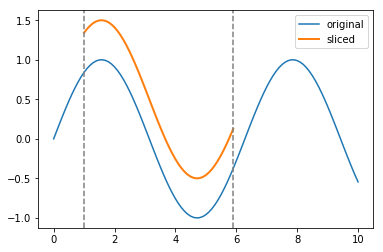

In [11]:
# A more interesting example
# We perform a slicing operation on a vector
# Here we select the elements with indexes from 10 to 59
x = np.linspace(0,10,101)
y = np.sin(x)

x_sliced = x[10:60]
y_sliced = y[10:60]

# We offset the sliced data to show it
plt.plot(x,y, label='original')
plt.plot(x_sliced, y_sliced+ 0.5, label='sliced', lw=2)

# We also plot the location of the slicers
# Remember that slice operations do not include the last index!
for i in [10,59]:
    print ("index:",i, "; value of x:", x[i])
    plt.axvline(x[i], color='gray', linestyle='--')

plt.legend()
plt.show()

### 02. Input/Output of data

For loading/saving data we will be using the Wine Recognition Data.

The file needs to be in the same folder that your notebook.

#### Note:
Libraries such as pandas support IO for a number of different files, including CSV, Excel, JSON, and others.

Such functions are not covered in this workshop but the interested reader is referred to the pandas documentationL

https://pandas.pydata.org/pandas-docs/stable/io.html

In [12]:
# Before loading the data it is always good to look at the file
# numpy has some built-in functions to load data from files, lets use loadtxt
datafile = "data_wine.txt"
data     = np.loadtxt(datafile, delimiter=',', skiprows=3)

# to load the header we could use the built-in functions of python
n = 2
with open(datafile, 'r') as f:
    for i in range(n):
        f.readline()
    headers = f.readline().split(",")

# printing the data and headers
print ("Raw data")
print (headers)
print (data[0:5,0:5])

# cleaning the last header
# removing first column
headers[-1] = headers[-1][:-1]
data = data[:,1:]

print ("\nCleaned data")
print (headers)
print (data[0:5,0:5])

Raw data
['alcohol', ' malic_acid', ' ash', ' ash_alkalinity', ' magnesium', ' phenols', ' flavanoids', ' nonflavanoid_phenols', ' proanthocyanins', ' color_intensity', ' hue', ' OD', ' proline\n']
[[ 1.   14.23  1.71  2.43 15.6 ]
 [ 1.   13.2   1.78  2.14 11.2 ]
 [ 1.   13.16  2.36  2.67 18.6 ]
 [ 1.   14.37  1.95  2.5  16.8 ]
 [ 1.   13.24  2.59  2.87 21.  ]]

Cleaned data
['alcohol', ' malic_acid', ' ash', ' ash_alkalinity', ' magnesium', ' phenols', ' flavanoids', ' nonflavanoid_phenols', ' proanthocyanins', ' color_intensity', ' hue', ' OD', ' proline']
[[ 14.23   1.71   2.43  15.6  127.  ]
 [ 13.2    1.78   2.14  11.2  100.  ]
 [ 13.16   2.36   2.67  18.6  101.  ]
 [ 14.37   1.95   2.5   16.8  113.  ]
 [ 13.24   2.59   2.87  21.   118.  ]]


In [13]:
# after reading the data, we can save it as a numpy array in a file
# note that the "npy" extension is automatically added
np.save("my_data", data)
np.save("my_headers", headers)

# after saving we can load the data with the load function
my_data    = np.load("my_data.npy")
my_headers = np.load("my_headers.npy")
print (my_headers)
print (my_data[:10,:3])

['alcohol' ' malic_acid' ' ash' ' ash_alkalinity' ' magnesium' ' phenols'
 ' flavanoids' ' nonflavanoid_phenols' ' proanthocyanins'
 ' color_intensity' ' hue' ' OD' ' proline']
[[14.23  1.71  2.43]
 [13.2   1.78  2.14]
 [13.16  2.36  2.67]
 [14.37  1.95  2.5 ]
 [13.24  2.59  2.87]
 [14.2   1.76  2.45]
 [14.39  1.87  2.45]
 [14.06  2.15  2.61]
 [14.83  1.64  2.17]
 [13.86  1.35  2.27]]


### 03. Basic Linear Algebra

In [14]:
# The * operator multiplies element-wise in arrays
# The dot product needs to be explicitly requested
A = np.arange(1,5).reshape(2,2)
B = 2*np.ones((2,2), dtype=int)

print ("Matrix A:\n", A)
print ("Matrix B:\n", B)
print ("Transpose A:\n", A.T)
print ("Element wise A*B\n", A*B)
print ("Dot product A.B\n", np.dot(A,B))

Matrix A:
 [[1 2]
 [3 4]]
Matrix B:
 [[2 2]
 [2 2]]
Transpose A:
 [[1 3]
 [2 4]]
Element wise A*B
 [[2 4]
 [6 8]]
Dot product A.B
 [[ 6  6]
 [14 14]]


In [15]:
# Eigenvalues and eigenvectors of a matrix
eigenval, eigenvec = np.linalg.eig(A)
print ("Eigenvalues of A\n", eigenval)
print ("Eigenvectors of A\n", eigenvec)

# Determinant
print ("Determinant of A:\n", np.int(np.linalg.det(A)))

# Inverse of square matrix
A_inv = np.linalg.inv(A)
print ("Inverse of A:\n", np.linalg.inv(A))

# checking tolerance with identity matrix
np.allclose(np.dot(A, A_inv), np.eye(2))

Eigenvalues of A
 [-0.37228132  5.37228132]
Eigenvectors of A
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
Determinant of A:
 -2
Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]


True

In [16]:
# Solving a system of linear equations
# 3x + 5y + 3z = 5
# 2x - 3y - 2z = 5
# x  + 2y  -z  = 6
# Solution is x=2, y=1, z=-2

A = np.array([[3,5,3],[2,-3,-2], [1,2,-1]])
b = np.array([5,5,6])

x = np.linalg.solve(A,b)
print ("Solution to linear system:\n", x)
np.allclose(b,np.dot(A,x))

Solution to linear system:
 [ 2.  1. -2.]


True

### 04. Bsic statistics, random variables, statistical distributions

In [17]:
# numpy offers functions for basic central and dispersion statistics
a = np.random.uniform(-5,5,100)
print ("Minimum: {0:1.2f}".format(np.min(a)))
print ("Maximum: {0:1.2f}".format(np.max(a)))
print ("Range:   {0:1.2f}".format(np.ptp(a)))
print ("Mean:    {0:1.2f}".format(np.mean(a)))
print ("Stdev:   {0:1.2f}".format(np.std(a)))
print ("Var:     {0:1.2f}".format(np.var(a)))

Minimum: -4.51
Maximum: 4.96
Range:   9.47
Mean:    0.01
Stdev:   2.87
Var:     8.23


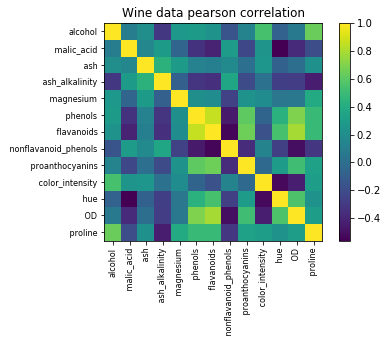

In [18]:
# Lets calculate the Pearson product-moment correlation coefficient for the Wine data
# We plot the results as an image for better visualization
corrcoef = np.corrcoef(data.T)

fig, ax = plt.subplots(1,1)
img = ax.imshow(corrcoef)
plt.colorbar(img, ax=ax)
ax.set_xticks(range(0,len(headers)))
ax.set_yticks(range(0,len(headers)))
ax.set_xticklabels(headers, rotation=90, fontsize=8)
ax.set_yticklabels(headers, fontsize=8)
ax.set_title("Wine data pearson correlation")
plt.show()

[0.79630467 0.73187427 0.90173261 0.21134967 0.15748354]


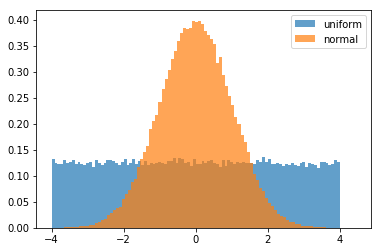

In [19]:
# for the case of random data, numpy offers numerous distributions
np.random.seed(1234)          # random seed
n        = 100000             # number of points
uni_rand = np.random.rand(n)  # uniform distribution [0,1)
nor_rand = np.random.randn(n) # normal distribution
uni_rand2= np.random.uniform(-4,4,n)  # uniform from [-4,4]

plt.hist(uni_rand2,bins= 100, normed=True, alpha=0.7, label='uniform')
plt.hist(nor_rand, bins= 100, normed=True, alpha=0.7, label='normal')

# checking reproducibility of results
print (np.random.rand(5))

plt.legend()
plt.show()

Principal moments of non-central F distribution:
	Mean: 1.14
	Variance: 0.30
	Skewness: 6210130.57
	Kurtosis: -26450479.51


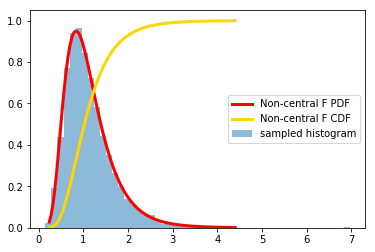

In [20]:
# Scipy offers many continous statistical distributions
# including convenient functions to extract moments and
# generate random samples
# Note that here we import the functions directly, avoiding aliases
from scipy.stats import ncf

# Parameters for non-central F distribution
# dfn = degrees of freedom numerator
# dfd = degrees of freedom denominator
# nc = non-centrality parameter
dfn, dfd, nc = 20,20, 0.5

# printing some moments for the function
moments = ["Mean: ","Variance: ","Skewness: ","Kurtosis: "]
mean, var, skew, kurt = ncf.stats(dfn, dfd, nc, moments='mvsk')

print ("Principal moments of non-central F distribution:")
for i, mom in enumerate([mean, var, skew, kurt]):
    print ("\t{0}{1:1.2f}".format(moments[i],mom))

# Calculate the probability density function (PDF)
# continous random variables include common methods to extract
# statistical information, such as the percent point function 
# (inverse of cumulative distribution function CDF) 
x0       = ncf.ppf(0.001, dfn, dfd, nc)    
x1       = ncf.ppf(0.999, dfn,dfd, nc)
x        = np.linspace(x0,x1,100)
ncf_pdf = ncf.pdf(x, dfn, dfd, nc)  # calculating the pdf
ncf_cdf = ncf.cdf(x, dfn, dfd, nc)  # calculating the cdf

# Random sampling the distribution
# through the random variates method
r = ncf.rvs(dfn, dfd, nc, size=10000)

# plotting the pdf and the sampling histogram
fig, ax = plt.subplots(1,1)
ax.hist(r, bins=50, normed=True, alpha=0.5, label='sampled histogram')
ax.plot(x,ncf_pdf, lw=3, color='red',  label='Non-central F PDF')
ax.plot(x,ncf_cdf, lw=3, color='gold', label='Non-central F CDF')
ax.legend(loc='center right')
plt.show()

### 05. Examples of data analysis 

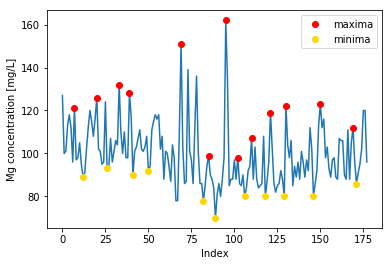

In [21]:
# Location of maxima and minima in numerical data
# Maximum and minimum concentrations of Mg in Wine data
from scipy.signal import argrelextrema

mg_conc = data[:,4]
index = np.arange(0,len(mg_conc))
maxvals = argrelextrema(mg_conc, np.greater, order=5)
minvals = argrelextrema(mg_conc, np.less, order=5)

fig, ax = plt.subplots(1,1)
ax.plot(index, mg_conc)
ax.plot(index[maxvals], mg_conc[maxvals], linestyle='', marker='o', color='red', label='maxima')
ax.plot(index[minvals], mg_conc[minvals], linestyle='', marker='o', color='gold', label='minima')
ax.set_ylabel("Mg concentration [mg/L]")
ax.set_xlabel("Index")
ax.legend()
plt.show()

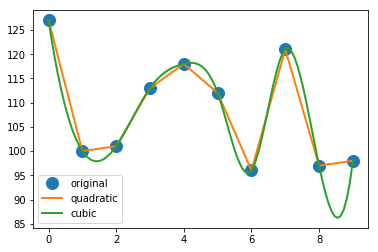

In [22]:
# Data interpolation
from scipy import interpolate

# interpolating the first 10 points of Mg concentration in Wine
liner = interpolate.interp1d(index[:10], mg_conc[:10], kind='slinear')
quadr = interpolate.interp1d(index[:10], mg_conc[:10], kind='quadratic')
cubic = interpolate.interp1d(index[:10], mg_conc[:10], kind='cubic')


# calculating the interpolated data
new_index   = np.linspace(0,index[9], 100)
lin_mg_conc = liner(new_index)
qua_mg_conc = quadr(new_index)
cub_mg_conc = cubic(new_index)


# plotting the original and interpolated data
fig, ax = plt.subplots(1,1)
ax.plot(index[:10], mg_conc[:10], marker='o', ls='', ms=12, label='original')
ax.plot(new_index, lin_mg_conc, lw=2, label='quadratic')
#ax.plot(new_index, qua_mg_conc, lw=2, label='quadratic')
ax.plot(new_index, cub_mg_conc, lw=2, label='cubic')
ax.legend()

plt.show()

r-squared:0.315


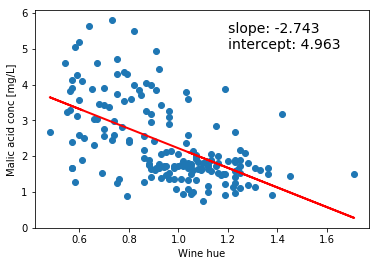

In [23]:
# Linear regression between hue and color intensity in wine data
from scipy import stats 
hue        = data[:,10]
malic_acid = data[:,1]

# calculating the slope, intercept and additional metrics
slope, intercept, r_value, p_value, std_err = stats.linregress(hue, malic_acid)
text = "slope: {0:1.3f}\nintercept: {1:1.3f}".format(slope, intercept)
print("r-squared:{0:1.3f}".format(r_value**2))

# plotting the data
fig, ax = plt.subplots(1,1)
ax.plot(hue, malic_acid, ls='', marker='o')
ax.plot(hue, intercept + slope*hue, color='red', lw=2)
ax.set_xlabel('Wine hue')
ax.set_ylabel('Malic acid conc [mg/L]')
ax.text(1.2, 5, text, fontsize=14)

plt.show()

Optimized parameters:
 [1.03153457 0.50373424 1.99820647]


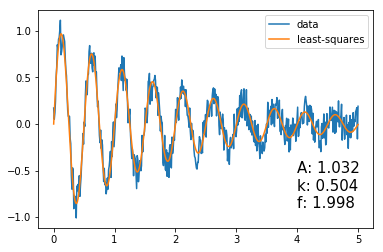

In [24]:
# Least-squares fitting
# Determining model parameters from data
# that follows Ae^{-kt}*sin(2*pi*f*t)
from scipy import optimize

# defining function and residual
def fun(x,A,k,f):
    return A*np.sin(2*np.pi*f*x)*np.exp(-k*t)

def resid(p, x, y):
    return y - fun(x,*p)

# producing data
np.random.seed(12345)                   # random seed
pars = {'A': 1.0, 'k': 0.5, 'f': 2}     # dictionary of parameters
t    = np.linspace(0,5,500)
y    = fun(t,pars['A'], pars['k'], pars['f']) + np.random.uniform(-0.2,0.2,len(t))

# performing the least squares fit
p0 = [1,1,1]
popt, pcov = optimize.leastsq(resid, p0, args=(t, y))
text = "A: {0:1.3f}\nk: {1:1.3f}\nf: {2:1.3f}".format(*popt)

print ("Optimized parameters:\n", popt)

fig, ax = plt.subplots(1,1)
ax.plot(t,y, label='data')
ax.plot(t,fun(t,*popt), label='least-squares')
ax.text(4,-0.9, text, fontsize=15)
ax.legend()
plt.show()